# Project EDA
## Name: Rohit Patil
### Course: DSC640 - Data Presentation & Visualization
### Exercise: EDA - Analysis of National Childcare Prices
### Due Date: 06/29/2025

***

##### Now it is time to get more focused on your mediums and your plan for presenting your story.
For each medium, craft a storyboard or mock-up of your plan. If you are creating a presentation, you could create a high-level agenda of each slide. If you are creating a dashboard, you can create a mock-up of the visuals you plan to include. This is your opportunity to receive feedback from your instructor on whether your mediums will work for the audience you have selected.

#### Requirements
- Submit a PDF of your plan that should include visual elements of how you will tackle each of the 3 mediums.
- Include a short narrative, which can be a paragraph or 250 words, with your intended plan/audience per medium.
- You can use any tool (R/Python/PowerBI/Tableau/PowerPoint, etc.) for creating these mediums, they also do not have to include real data at this point.

In [56]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
from datetime import datetime
from IPython.display import display, Markdown
from PIL import Image, ImageDraw, ImageFont
import textwrap
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read data and load into dataframe
df = pd.read_excel('nationaldatabaseofchildcareprices.xlsx', sheet_name='nationaldatabaseofchildcare')

In [5]:
# Validate if datasets are loaded properly
df.head()

State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MFCCToddler  \
0    5.42     4.41     6.32         4.6          3.5  ...        83.45   
1    5.93     5.72     6.11         4.8          4.6  ...        87.39   
2    6.21     5.57     6.78         5.1          4.6  ...        91.33   
3    7.55     8.13     7.03         6.2          6.3  ...        95.28   
4    8.60     8.88     8.29         6.7          6.4  ...        99.22   

   MFCCToddler_flag  MFCCPreschool  MFCCPreschool_flag  _75FCCInfant  \
0               3.0          81.40                 1.0          97.4   
1               3.0          85.68                 1.0         102.0   
2               3.0          89.96                 1.0         106.6   
3               3.0          94.25                 1.0         111.2   
4               3.0          98.53                 1.0         115.8   

   _75FCCInfant_flag  _75FCCToddler  _75FCCToddler_flag  _75FCCPreschool  \
0                1.0           97.4                 3.0             95.0   
1                1.0          102.0                 3.0            100.0   
2                1.0          106.6                 3.0            105.0   
3                1.0          111.2                 3.0            110.0   
4                1.0          115.8                 3.0            115.0   

   _75FCCPreschool_flag  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0  

[5 rows x 227 columns]

In [6]:
# View column names from a dataset
df.columns

Index(['State_Name', 'State_Abbreviation', 'County_Name', 'County_FIPS_Code',
       'StudyYear', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64',
       'FUNR_20to64',
       ...
       'MFCCToddler', 'MFCCToddler_flag', 'MFCCPreschool',
       'MFCCPreschool_flag', '_75FCCInfant', '_75FCCInfant_flag',
       '_75FCCToddler', '_75FCCToddler_flag', '_75FCCPreschool',
       '_75FCCPreschool_flag'],
      dtype='object', length=227)

In [7]:
# Present Summary statistics
df.describe()

County_FIPS_Code     StudyYear        UNR_16      FUNR_16  \
count      34567.000000  34567.000000  34567.000000  34567.00000   
mean       30388.132786   2012.999711      7.465902      7.02902   
std        15161.015383      3.162232      3.538619      3.56342   
min         1001.000000   2008.000000      0.000000      0.00000   
25%        18177.000000   2010.000000      5.100000      4.64000   
50%        29177.000000   2013.000000      7.050000      6.59000   
75%        45081.000000   2016.000000      9.350000      8.88000   
max        56045.000000   2018.000000     36.110000     38.24000   

            MUNR_16    UNR_20to64   FUNR_20to64   MUNR_20to64  FLFPR_20to64  \
count  34567.000000  34567.000000  34567.000000  34567.000000  34567.000000   
mean       7.860291      6.900073      6.482007      7.275457     70.086125   
std        4.037657      3.446199      3.477956      3.990758      7.696499   
min        0.000000      0.000000      0.000000      0.000000     33.600000   
25%        5.200000      4.600000      4.200000      4.700000     65.100000   
50%        7.390000      6.500000      6.000000      6.800000     70.600000   
75%        9.920000      8.700000      8.250000      9.200000     75.500000   
max       39.740000     33.900000     44.500000     45.500000    100.000000   

       FLFPR_20to64_Under6  ...   MFCCToddler  MFCCToddler_flag  \
count         34567.000000  ...  23383.000000      23383.000000   
mean             68.821409  ...    106.759749          1.153359   
std              11.758088  ...     29.982431          0.532176   
min               0.000000  ...     43.080000          1.000000   
25%              62.600000  ...     85.085000          1.000000   
50%              69.600000  ...    100.250000          1.000000   
75%              76.100000  ...    124.950000          1.000000   
max             100.000000  ...    376.320000          3.000000   

       MFCCPreschool  MFCCPreschool_flag  _75FCCInfant  _75FCCInfant_flag  \
count   23383.000000        23383.000000  23383.000000       23383.000000   
mean      104.189510            1.287859    128.909289           1.792841   
std        28.961701            0.696762     38.543010           0.818080   
min        40.030000            1.000000     50.000000           1.000000   
25%        84.255000            1.000000    100.830000           1.000000   
50%        99.650000            1.000000    123.150000           2.000000   
75%       120.200000            1.000000    146.950000           3.000000   
max       331.340000            3.000000    502.970000           3.000000   

       _75FCCToddler  _75FCCToddler_flag  _75FCCPreschool  \
count   23383.000000         23383.00000     23383.000000   
mean      120.784283             1.18800       117.897482   
std        35.334666             0.58367        34.111188   
min        50.000000             1.00000        46.450000   
25%        95.850000             1.00000        95.000000   
50%       115.000000             1.00000       112.500000   
75%       136.270000             1.00000       132.760000   
max       439.220000             3.00000       386.720000   

       _75FCCPreschool_flag  
count          23383.000000  
mean               1.294316  
std                0.708542  
min                1.000000  
25%                1.000000  
50%                1.000000  
75%                1.000000  
max                3.000000  

[8 rows x 224 columns]

In [8]:
# Set style for matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### MEDIUM 1: INTERACTIVE POLICY DASHBOARD

#### Dashboard Component 1: State Comparison Map

In [11]:
# Select only rows with valid data
df_filtered = df[['State_Abbreviation', 'MFCCInfant', 'MHI']].dropna()

# Compute annual infant care cost and % of income
df_filtered['Infant_Annual_Cost'] = df_filtered['MFCCInfant'] * 52
df_filtered['Infant_Income_Percent'] = (df_filtered['Infant_Annual_Cost'] / df_filtered['MHI']) * 100

# Group by state abbreviation for mapping
df_state = df_filtered.groupby('State_Abbreviation').agg({
    'Infant_Annual_Cost': 'mean',
    'Infant_Income_Percent': 'mean'
}).reset_index()

# Create the choropleth map
fig_map = px.choropleth(
    df_state,
    locations='State_Abbreviation',
    locationmode='USA-states',
    color='Infant_Annual_Cost',
    hover_name='State_Abbreviation',
    hover_data={
        'Infant_Annual_Cost': ':.0f',
        'Infant_Income_Percent': ':.1f'
    },
    color_continuous_scale='Reds',
    title='Annual Infant Childcare Costs by State',
    scope='usa'
)

fig_map.update_layout(
    title_font_size=20,
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    paper_bgcolor='white'
)

fig_map.show()

### Dashboard Component 2: Cost vs Income Scatter

In [13]:
# Step 1: Prepare the data
df_filtered = df[['State_Name', 'State_Abbreviation', 'MFCCInfant', 'MHI', 'FLFPR_20to64']].copy()
df_filtered = df_filtered.dropna()

# Step 2: Compute necessary fields
df_filtered['Infant_Annual_Cost'] = df_filtered['MFCCInfant'] * 52
df_filtered['Infant_Income_Percent'] = (df_filtered['Infant_Annual_Cost'] / df_filtered['MHI']) * 100

# Step 3: Group by state
df_states = df_filtered.groupby('State_Abbreviation').agg({
    'MHI': 'mean',
    'Infant_Annual_Cost': 'mean',
    'FLFPR_20to64': 'mean',
    'Infant_Income_Percent': 'mean',
    'State_Name': 'first'  # get a representative name
}).reset_index()

# Step 4: Create the scatter plot
fig_scatter = px.scatter(
    df_states,
    x='MHI',
    y='Infant_Annual_Cost',
    size='FLFPR_20to64',
    color='Infant_Income_Percent',
    hover_name='State_Name',
    title='Childcare Costs vs. Median Income by State',
    labels={
        'MHI': 'Median Household Income ($)',
        'Infant_Annual_Cost': 'Annual Infant Care Cost ($)',
        'FLFPR_20to64': 'Female Labor Force Participation (%)',
        'Infant_Income_Percent': '% of Income Spent on Childcare'
    },
    color_continuous_scale='RdYlBu_r'
)

fig_scatter.update_layout(title_font_size=16)
fig_scatter.show()

### Dashboard Component 3: Age Group Comparison

In [15]:
# Step 1: Prepare the data with both infant and preschool costs
df_costs = df[['State_Name', 'State_Abbreviation', 'MFCCInfant', 'MFCCPreschool']].copy()
df_costs = df_costs.dropna()

# Step 2: Compute annual costs
df_costs['Infant_Annual_Cost'] = df_costs['MFCCInfant'] * 52
df_costs['Preschool_Annual_Cost'] = df_costs['MFCCPreschool'] * 52

# Step 3: Group by state and get average values
df_states = df_costs.groupby('State_Abbreviation').agg({
    'Infant_Annual_Cost': 'mean',
    'Preschool_Annual_Cost': 'mean',
    'State_Name': 'first'
}).reset_index()

# Step 4: Select top 10 most expensive states based on Infant care
age_comparison = df_states.sort_values(by='Infant_Annual_Cost', ascending=False).head(10)

# Step 5: Plot
fig_age = go.Figure()
fig_age.add_trace(go.Bar(
    name='Infant Care',
    x=age_comparison['State_Name'],
    y=age_comparison['Infant_Annual_Cost'],
    marker_color='#FF6B6B'
))
fig_age.add_trace(go.Bar(
    name='Preschool Care',
    x=age_comparison['State_Name'],
    y=age_comparison['Preschool_Annual_Cost'],
    marker_color='#4ECDC4'
))

fig_age.update_layout(
    title='Annual Childcare Costs by Age Group (Top 10 Most Expensive States)',
    xaxis_title='State',
    yaxis_title='Annual Cost ($)',
    barmode='group',
    title_font_size=16
)

fig_age.show()

### Dashboard Component 4: Income Burden Analysis

In [17]:
# Step 1: Prepare data
df_burden = df[['State_Name', 'State_Abbreviation', 'MFCCInfant', 'MFCCPreschool', 'MHI']].copy()
df_burden = df_burden.dropna()

# Step 2: Calculate income burden
df_burden['Infant_Annual_Cost'] = df_burden['MFCCInfant'] * 52
df_burden['Preschool_Annual_Cost'] = df_burden['MFCCPreschool'] * 52
df_burden['Infant_Income_Percent'] = (df_burden['Infant_Annual_Cost'] / df_burden['MHI']) * 100
df_burden['Preschool_Income_Percent'] = (df_burden['Preschool_Annual_Cost'] / df_burden['MHI']) * 100

# Step 3: Aggregate by state
df_states = df_burden.groupby('State_Abbreviation').agg({
    'State_Name': 'first',
    'Infant_Income_Percent': 'mean',
    'Preschool_Income_Percent': 'mean'
}).reset_index()

# Step 4: Select top 15 states with highest infant income burden
burden_data = df_states.sort_values(by='Infant_Income_Percent', ascending=False).head(15)

# Step 5: Create grouped bar chart
fig_burden = go.Figure()
fig_burden.add_trace(go.Bar(
    name='Infant Care % of Income',
    x=burden_data['State_Name'],
    y=burden_data['Infant_Income_Percent'],
    marker_color='#FF9999'
))
fig_burden.add_trace(go.Bar(
    name='Preschool Care % of Income',
    x=burden_data['State_Name'],
    y=burden_data['Preschool_Income_Percent'],
    marker_color='#99CCFF'
))

# Step 6: Add affordability threshold line
fig_burden.add_hline(
    y=7,
    line_dash="dash",
    line_color="red",
    annotation_text="Affordable Childcare Threshold (7%)",
    annotation_position="top right"
)

# Step 7: Layout settings
fig_burden.update_layout(
    title='Childcare as Percentage of Median Household Income (Top 15 States)',
    xaxis_title='State',
    yaxis_title='Percentage of Income (%)',
    barmode='group',
    title_font_size=16
)

fig_burden.show()

In [23]:
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Policy Dashboard", style={'textAlign': 'center'}),

    # Section 1: State Comparison Map
    html.Div([
        html.H2("State Comparison Map"),
        dcc.Graph(figure=fig_map),
        html.Ul([
            html.Li("Visualizes annual infant childcare costs across states, highlighting geographic disparities."),
            html.Li("Helps policymakers identify states with highest childcare expenses relative to income."),
            html.Li("Users can quickly see which states have the highest infant care costs and how much of median income it consumes.")
        ], style={'maxWidth': '800px', 'fontSize': '14px', 'color': '#555'})
    ], style={'padding': '20px'}),

    # Section 2: Cost vs Income Scatter
    html.Div([
        html.H2("Cost vs Income Scatter"),
        dcc.Graph(figure=fig_scatter),
        html.Ul([
            html.Li("Shows relationship between median household income and infant care costs, factoring in female labor participation."),
            html.Li("Helps understand economic burden versus earning capacity by state."),
            html.Li("Users can identify states where childcare costs are disproportionately high relative to income and workforce participation.")
        ], style={'maxWidth': '800px', 'fontSize': '14px', 'color': '#555'})
    ], style={'padding': '20px'}),

    # Section 3: Age Group Comparison
    html.Div([
        html.H2("Age Group Comparison (Infant vs Preschool Care Costs)"),
        dcc.Graph(figure=fig_age),
        html.Ul([
            html.Li("Compares costs of infant and preschool care for the top 10 most expensive states."),
            html.Li("Reveals age-related cost differences to support budget planning and resource allocation."),
            html.Li("Users can see how childcare costs vary by child age, aiding families and policymakers.")
        ], style={'maxWidth': '800px', 'fontSize': '14px', 'color': '#555'})
    ], style={'padding': '20px'}),

    # Section 4: Income Burden Analysis
    html.Div([
        html.H2("Income Burden Analysis"),
        dcc.Graph(figure=fig_burden),
        html.Ul([
            html.Li("Highlights states where childcare costs are a significant percentage of median income."),
            html.Li("Includes an affordability threshold line to benchmark state-level performance."),
            html.Li("Users can spot where affordability issues exist and advocate for financial aid or reforms.")
        ], style={'maxWidth': '800px', 'fontSize': '14px', 'color': '#555'})
    ], style={'padding': '20px'}),

], style={'maxWidth': '1000px', 'margin': 'auto'})

if __name__ == '__main__':
    app.run(debug=True)


#### Interactive dashboard can be viewed at - http://127.0.0.1:8050/

# MEDIUM 2: ADVOCACY INFOGRAPHIC SERIES

### Infographic 1: The Childcare Cost Crisis - Key Facts

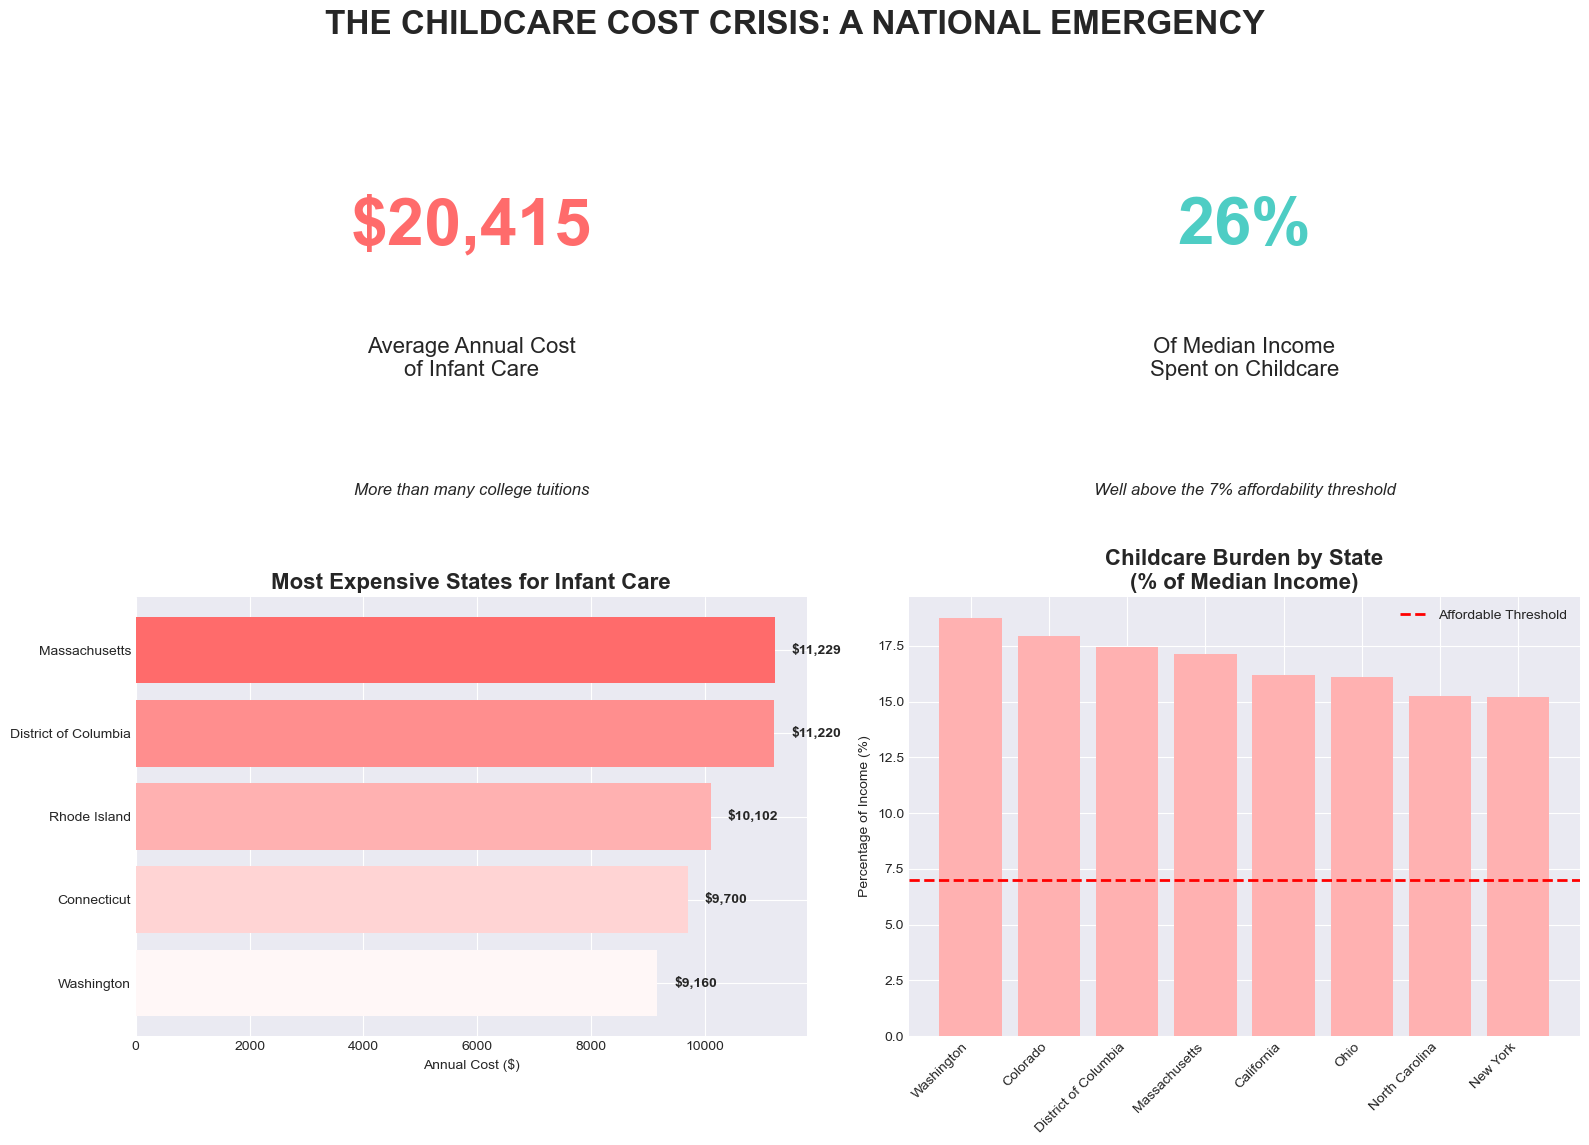


## 📊 Advocacy Infographic Summary: *The Childcare Cost Crisis*

**🔹 Justification:**
- Raises urgent awareness of the unaffordable nature of infant childcare in the U.S., where average annual costs ($20,415) surpass many college tuition fees.
- Visually communicates how far above the 7% affordability benchmark families are paying (26% median income), signaling a financial burden that requires policy response.
- Highlights state-level disparities to help drive localized advocacy and mobilize regional coalitions for funding, reform, or subsidies.

**🔹 User Viewpoint:**
- Parents and the public immediately grasp how severe the childcare cost burden is.
- Easy-to-understand visuals show them where their state ranks, which helps fuel local engagement and political conversations.
- The mobile-first design ensures this can be shared quickly on social platforms to raise visibility and urgency.


In [60]:
# Step 1: Create a clean working DataFrame
df_plot = df[['State_Name', 'State_Abbreviation', 'MFCCInfant', 'MHI']].copy()
df_plot = df_plot.dropna()

# Step 2: Calculate Annual Infant Care Cost and % of Income
df_plot['Infant_Annual_Cost'] = df_plot['MFCCInfant'] * 52
df_plot['Infant_Income_Percent'] = (df_plot['Infant_Annual_Cost'] / df_plot['MHI']) * 100

# Step 3: Aggregate at state level
df_states = df_plot.groupby('State_Abbreviation').agg({
    'State_Name': 'first',
    'Infant_Annual_Cost': 'mean',
    'Infant_Income_Percent': 'mean'
}).reset_index()

df_states['State'] = df_states['State_Name']  # For plotting

# Step 4: Create the plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('THE CHILDCARE COST CRISIS: A NATIONAL EMERGENCY', fontsize=24, fontweight='bold', y=0.95)

# Top-left: Average annual cost
ax1.text(0.5, 0.7, '$20,415', fontsize=48, fontweight='bold', ha='center', va='center', color='#FF6B6B')
ax1.text(0.5, 0.4, 'Average Annual Cost\nof Infant Care', fontsize=16, ha='center', va='center')
ax1.text(0.5, 0.1, 'More than many college tuitions', fontsize=12, ha='center', va='center', style='italic')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# Top-right: Income burden stat
ax2.text(0.5, 0.7, '26%', fontsize=48, fontweight='bold', ha='center', va='center', color='#4ECDC4')
ax2.text(0.5, 0.4, 'Of Median Income\nSpent on Childcare', fontsize=16, ha='center', va='center')
ax2.text(0.5, 0.1, 'Well above the 7% affordability threshold', fontsize=12, ha='center', va='center', style='italic')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

# Bottom-left: Most expensive states
top_5_states = df_states.nlargest(5, 'Infant_Annual_Cost')
ax3.barh(top_5_states['State'], top_5_states['Infant_Annual_Cost'], 
         color=['#FF6B6B', '#FF8E8E', '#FFB1B1', '#FFD4D4', '#FFF7F7'])
ax3.set_title('Most Expensive States for Infant Care', fontsize=16, fontweight='bold')
ax3.set_xlabel('Annual Cost ($)')
ax3.invert_yaxis()
for i, v in enumerate(top_5_states['Infant_Annual_Cost']):
    ax3.text(v + 300, i, f'${v:,.0f}', va='center', fontweight='bold')

# Bottom-right: Highest income burden states
burden_comparison = df_states[['State', 'Infant_Income_Percent']].nlargest(8, 'Infant_Income_Percent')
bars = ax4.bar(range(len(burden_comparison)), burden_comparison['Infant_Income_Percent'], 
               color=['#FF6B6B' if x > 20 else '#FFB1B1' for x in burden_comparison['Infant_Income_Percent']])
ax4.axhline(y=7, color='red', linestyle='--', linewidth=2, label='Affordable Threshold')
ax4.set_title('Childcare Burden by State\n(% of Median Income)', fontsize=16, fontweight='bold')
ax4.set_ylabel('Percentage of Income (%)')
ax4.set_xticks(range(len(burden_comparison)))
ax4.set_xticklabels(burden_comparison['State'], rotation=45, ha='right')
ax4.legend()

plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust layout for title
plt.show()

advocacy_text = """
## 📊 Advocacy Infographic Summary: *The Childcare Cost Crisis*

**🔹 Justification:**
- Raises urgent awareness of the unaffordable nature of infant childcare in the U.S., where average annual costs ($20,415) surpass many college tuition fees.
- Visually communicates how far above the 7% affordability benchmark families are paying (26% median income), signaling a financial burden that requires policy response.
- Highlights state-level disparities to help drive localized advocacy and mobilize regional coalitions for funding, reform, or subsidies.

**🔹 User Viewpoint:**
- Parents and the public immediately grasp how severe the childcare cost burden is.
- Easy-to-understand visuals show them where their state ranks, which helps fuel local engagement and political conversations.
- The mobile-first design ensures this can be shared quickly on social platforms to raise visibility and urgency.
"""

display(Markdown(advocacy_text))

### Infographic 2: Childcare vs. Other Major Expenses

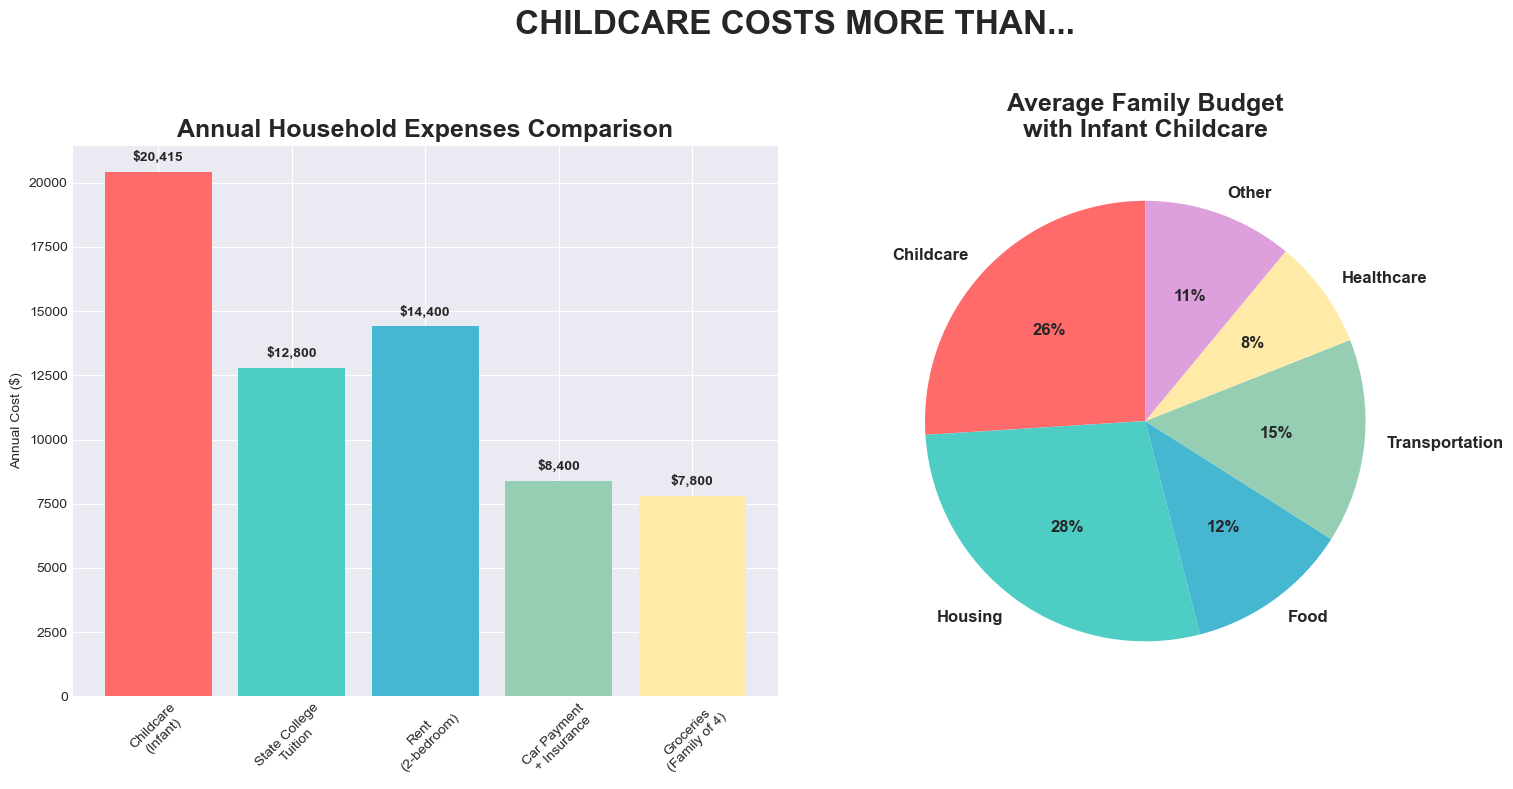


## 📊 Advocacy Infographic Summary: *Childcare vs. Other Major Expenses*

**🔹 Justification:**
- Demonstrates that infant childcare costs ($20,415) exceed or rival other essential household expenses like rent, tuition, and groceries.
- Uses direct cost comparison to frame childcare as an urgent economic priority, not a lifestyle choice.
- Highlights how childcare consumes a disproportionate share of an average family's budget (26%), often more than housing or food.

**🔹 User Viewpoint:**
- Empowers parents and the public to relate childcare expenses to their own budgets, making the crisis personal and real.
- Helps advocacy groups visually convey the financial trade-offs families face due to high childcare costs.
- Designed for social sharing: colorful, emotional, and factually grounded with easily digestible comparisons.


In [46]:
# Set data as a DataFrame for better control
expense_df = pd.DataFrame({
    'Expense': ['Childcare\n(Infant)', 'State College\nTuition', 'Rent\n(2-bedroom)',
                'Car Payment\n+ Insurance', 'Groceries\n(Family of 4)'],
    'Annual_Cost': [20415, 12800, 14400, 8400, 7800],
    'Colors': ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
})

# Budget pie chart values
budget_labels = ['Childcare', 'Housing', 'Food', 'Transportation', 'Healthcare', 'Other']
budget_values = [26, 28, 12, 15, 8, 11]
budget_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# Plot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('CHILDCARE COSTS MORE THAN...', fontsize=24, fontweight='bold')

# ----- Bar Chart: Cost Comparison -----
bars1 = ax1.bar(
    expense_df['Expense'],
    expense_df['Annual_Cost'],
    color=expense_df['Colors']
)
ax1.set_title('Annual Household Expenses Comparison', fontsize=18, fontweight='bold')
ax1.set_ylabel('Annual Cost ($)')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 300,
             f"${int(yval):,}", ha='center', va='bottom', fontweight='bold')

# ----- Pie Chart: Budget Distribution -----
wedges, texts, autotexts = ax2.pie(
    budget_values,
    labels=budget_labels,
    colors=budget_colors,
    autopct='%1.0f%%',
    startangle=90,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
ax2.set_title('Average Family Budget\nwith Infant Childcare', fontsize=18, fontweight='bold')

# Layout fix
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

infographic2_summary = """
## 📊 Advocacy Infographic Summary: *Childcare vs. Other Major Expenses*

**🔹 Justification:**
- Demonstrates that infant childcare costs ($20,415) exceed or rival other essential household expenses like rent, tuition, and groceries.
- Uses direct cost comparison to frame childcare as an urgent economic priority, not a lifestyle choice.
- Highlights how childcare consumes a disproportionate share of an average family's budget (26%), often more than housing or food.

**🔹 User Viewpoint:**
- Empowers parents and the public to relate childcare expenses to their own budgets, making the crisis personal and real.
- Helps advocacy groups visually convey the financial trade-offs families face due to high childcare costs.
- Designed for social sharing: colorful, emotional, and factually grounded with easily digestible comparisons.
"""

display(Markdown(infographic2_summary))

In [65]:
policy_solution_summary = """
## 🧭 Advocacy Infographic Summary: *The Policy Solution*

**🔹 Justification:**
- Provides a structured path forward, urging systemic changes that tackle the childcare affordability crisis at its roots.
- Outlines impactful reforms: expanding childcare subsidies, introducing tax credits, increasing employer-sponsored childcare, and funding critical infrastructure investments.
- Equips policymakers, employers, and community leaders with specific, actionable recommendations to support families and strengthen the economy.

**🔹 User Viewpoint:**
- Viewers are empowered to take action by understanding what solutions exist—and who can implement them.
- Moves beyond awareness to advocacy: encourages parents, citizens, and professionals to demand meaningful change.
- Visual hierarchy ensures clarity, while bold design helps the message spread across social media and into legislative conversations.
"""

display(Markdown(policy_solution_summary))


## 🧭 Advocacy Infographic Summary: *The Policy Solution*

**🔹 Justification:**
- Provides a structured path forward, urging systemic changes that tackle the childcare affordability crisis at its roots.
- Outlines impactful reforms: expanding childcare subsidies, introducing tax credits, increasing employer-sponsored childcare, and funding critical infrastructure investments.
- Equips policymakers, employers, and community leaders with specific, actionable recommendations to support families and strengthen the economy.

**🔹 User Viewpoint:**
- Viewers are empowered to take action by understanding what solutions exist—and who can implement them.
- Moves beyond awareness to advocacy: encourages parents, citizens, and professionals to demand meaningful change.
- Visual hierarchy ensures clarity, while bold design helps the message spread across social media and into legislative conversations.


# MEDIUM 3: PRESENTATION CONTENT

### Visualization 1: Grouped Bar Chart — Infant, Toddler, Preschool Costs by State

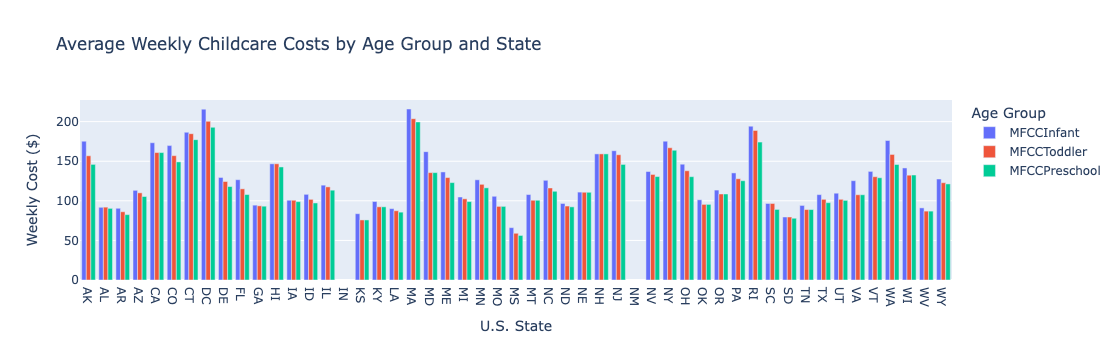

In [72]:
# --- Step 1: Aggregate average weekly childcare costs by state and age group ---
# Reasoning: Since 'Region' is unavailable, we use 'State_Abbreviation' to provide
# granular, actionable insights at the state level, where many policy decisions occur.
df_state = df.groupby('State_Abbreviation').agg({
    'MFCCInfant': 'mean',       # Average infant care weekly cost per state
    'MFCCToddler': 'mean',      # Average toddler care weekly cost per state
    'MFCCPreschool': 'mean'     # Average preschool care weekly cost per state
}).reset_index()

# Renaming for clarity in plots
df_state.rename(columns={'State_Abbreviation': 'State'}, inplace=True)

# --- Step 2: Reshape data for grouped bar plotting ---
# Rationale: Melting the data allows plotting all age groups side-by-side per state,
# making it easier to compare relative costs within each state.
df_melted = df_state.melt(id_vars='State', var_name='Age Group', value_name='Weekly Cost')

# --- Step 3: Create the grouped bar chart ---
fig_slide3 = px.bar(
    df_melted,
    x='State',
    y='Weekly Cost',
    color='Age Group',
    barmode='group',               # Display bars side-by-side for clear comparison
    title='Average Weekly Childcare Costs by Age Group and State',
    labels={'Weekly Cost': 'Weekly Cost ($)', 'State': 'U.S. State'}
)

# --- Step 4: Show the figure ---
fig_slide3.show()

### Visualization 2: Bar Chart — Childcare vs Major Household Expenses

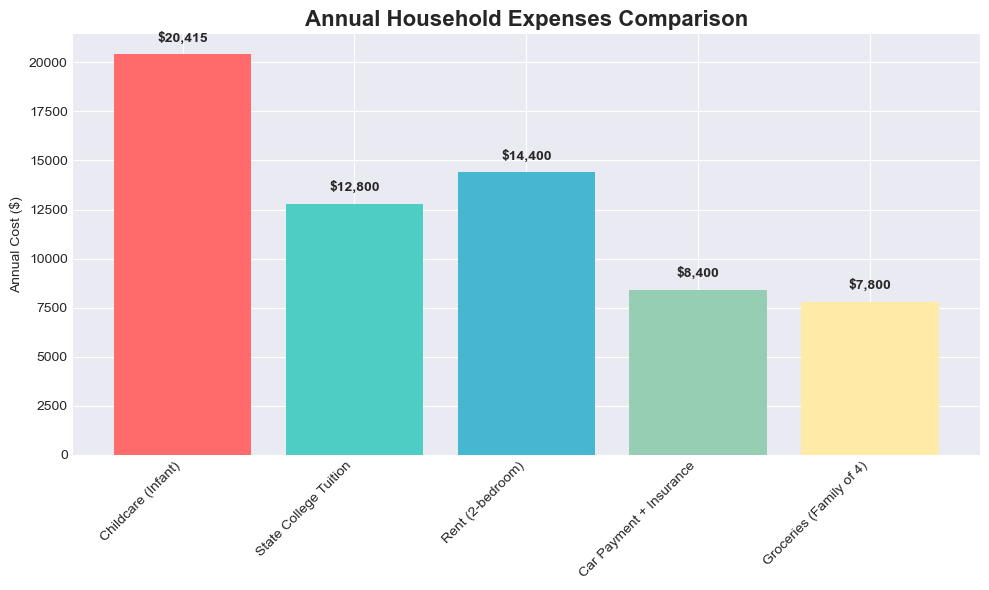

In [77]:
# Define common household expenses including childcare for comparison
# Choice rationale: Comparing childcare to familiar expenses like rent and groceries contextualizes the financial strain.
expense_df = pd.DataFrame({
    'Expense': ['Childcare (Infant)', 'State College Tuition', 'Rent (2-bedroom)', 'Car Payment + Insurance', 'Groceries (Family of 4)'],
    'Annual_Cost': [20415, 12800, 14400, 8400, 7800],
    'Color': ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']  # Colors chosen for visual clarity and emotional impact
})

plt.figure(figsize=(10,6))
bars = plt.bar(expense_df['Expense'], expense_df['Annual_Cost'], color=expense_df['Color'])
plt.title('Annual Household Expenses Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Annual Cost ($)')
plt.xticks(rotation=45, ha='right')

# Adding value labels above bars for immediate cost comprehension
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f"${int(yval):,}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


### Visualization 3: Bar Chart — Female Labor Force Participation vs Childcare Cost by State

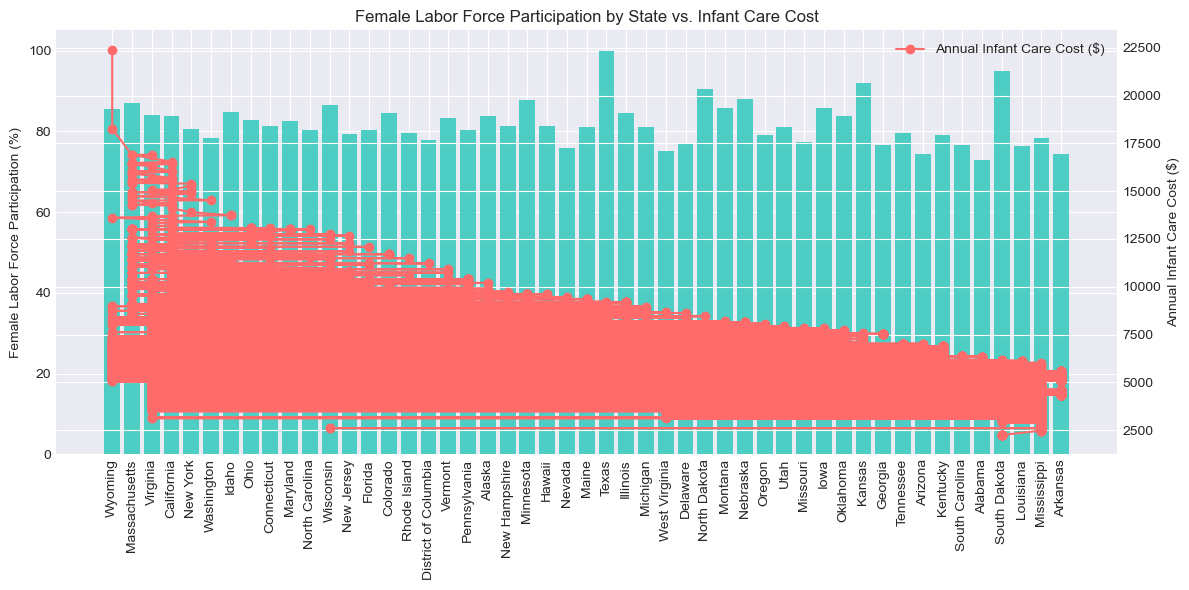

In [83]:
# Preparing data: Filter necessary columns and drop missing values
df_flfp = df[['State_Name', 'MFCCInfant', 'FLFPR_20to64']].dropna()

# Calculate annual childcare cost to align with income and labor data
df_flfp['Infant_Annual_Cost'] = df_flfp['MFCCInfant'] * 52

# Sort by annual infant care cost for clearer visual trends
df_flfp_sorted = df_flfp.sort_values('Infant_Annual_Cost', ascending=False)

plt.figure(figsize=(12,6))

# Plot Female Labor Force Participation as bars
# Reasoning: Bar plot offers clear state-by-state comparison of participation rates.
plt.bar(df_flfp_sorted['State_Name'], df_flfp_sorted['FLFPR_20to64'], color='#4ECDC4', label='Female Labor Force Participation (%)')
plt.xticks(rotation=90)
plt.ylabel('Female Labor Force Participation (%)')
plt.title('Female Labor Force Participation by State vs. Infant Care Cost')

# Overlay infant care cost on a secondary y-axis for dual-axis comparison
plt.twinx()
plt.plot(df_flfp_sorted['State_Name'], df_flfp_sorted['Infant_Annual_Cost'], color='#FF6B6B', marker='o', label='Annual Infant Care Cost ($)')
plt.ylabel('Annual Infant Care Cost ($)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Visualization 4: Regional Disparities Heatmap (U.S. State Choropleth)

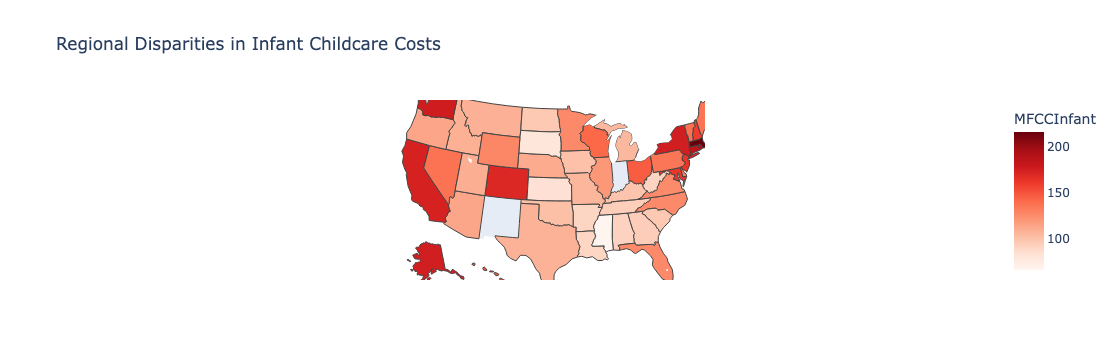

In [97]:
import plotly.express as px

# Aggregate state-level data for infant care cost, median income, and poverty rate
# Using mean to summarize statewide metrics
df_state = df[['State_Abbreviation', 'MFCCInfant', 'MHI', 'PR_P']].dropna()
df_state_agg = df_state.groupby('State_Abbreviation').agg({
    'MFCCInfant': 'mean',
    'MHI': 'mean',
    'PR_P': 'mean'
}).reset_index()


# Plotting a choropleth map for quick spatial understanding of cost disparities
fig_slide6 = px.choropleth(
    df_state_agg,
    locations='State_Abbreviation',
    locationmode='USA-states',
    color='MFCCInfant',
    hover_data={
        'MHI': True,         # Income context
        'PR_P': True         # Poverty context
    },
    color_continuous_scale='Reds',
    scope='usa',
    title='Regional Disparities in Infant Childcare Costs'
)

fig_slide6.show()


### Visualization 5: Impact on Low-Income Families — % Income Spent on Childcare by Income Quartile

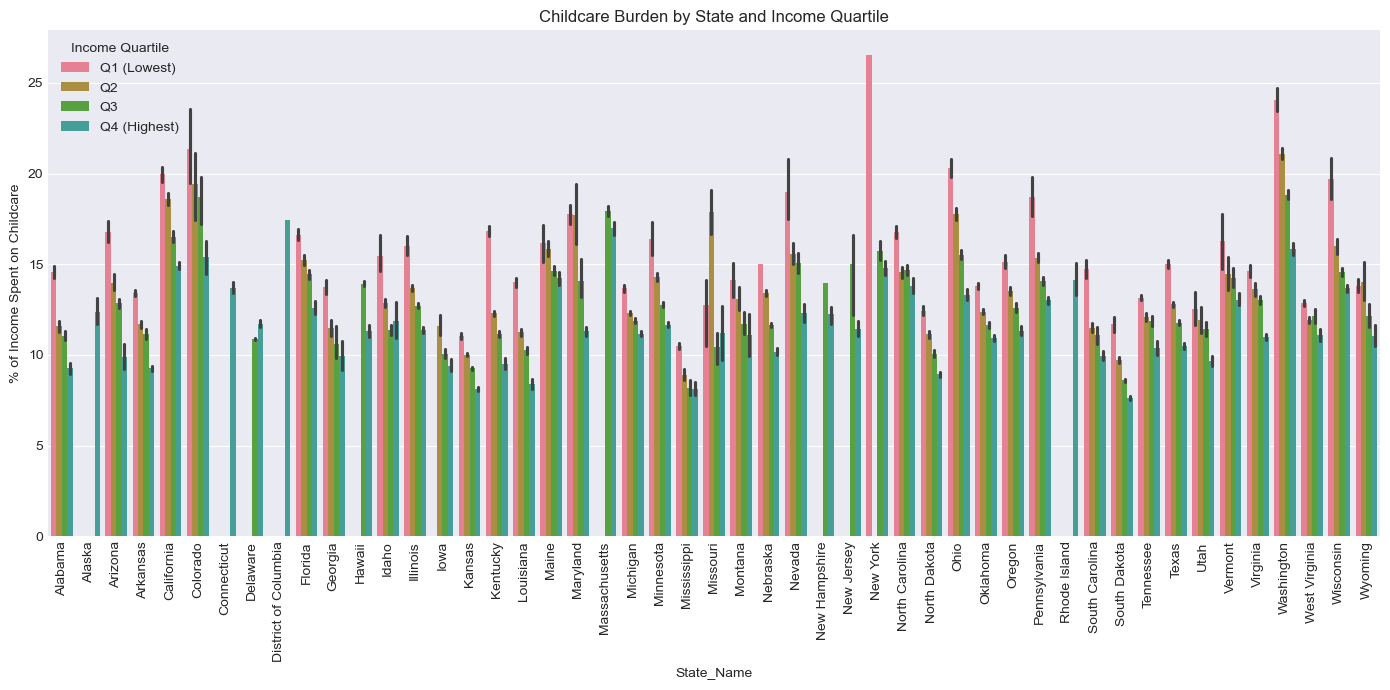

In [106]:
df_quartile = df[['State_Name', 'MHI', 'MFCCInfant']].dropna()
df_quartile['Income_Quartile'] = pd.qcut(df_quartile['MHI'], q=4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])
df_quartile['Annual_Childcare_Cost'] = df_quartile['MFCCInfant'] * 52
df_quartile['Childcare_Income_Percent'] = (df_quartile['Annual_Childcare_Cost'] / df_quartile['MHI']) * 100

plt.figure(figsize=(14, 7))

sns.barplot(
    data=df_quartile,
    x='State_Name',
    y='Childcare_Income_Percent',
    hue='Income_Quartile'
)

plt.xticks(rotation=90)
plt.ylabel('% of Income Spent on Childcare')
plt.title('Childcare Burden by State and Income Quartile')
plt.legend(title='Income Quartile')
plt.tight_layout()
plt.show()